In [1]:
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [3]:
tweets_data = pd.read_excel(r'C:\Users\BHAVANA\OneDrive\Desktop\Streams\Data Analytics\capx\twitter_stocks_data.xlsx')

In [4]:
def clean_tweet(tweet):
    if isinstance(tweet, str):
        tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
        tweet = re.sub(r'\@\w+|\#|\d+', '', tweet)
        tweet = re.sub(r'[^\w\s]', '', tweet)
        return tweet.lower()
    return ''

tweets_data['cleaned_tweet'] = tweets_data['Tweet'].apply(clean_tweet)

In [5]:
analyzer = SentimentIntensityAnalyzer()

In [6]:
def get_vader_sentiment(tweet):
    sentiment_dict = analyzer.polarity_scores(tweet)
    return sentiment_dict['compound']
tweets_data['vader_sentiment'] = tweets_data['cleaned_tweet'].apply(get_vader_sentiment)

In [7]:
def classify_vader_sentiment(compound):
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

tweets_data['vader_sentiment_label'] = tweets_data['vader_sentiment'].apply(classify_vader_sentiment)

In [9]:
tweets_data['Price_Change'] = tweets_data['Close'] - tweets_data['OPEN']

In [10]:
tweets_data['action'] = 'Hold'  # Default action
tweets_data.loc[(tweets_data['vader_sentiment_label'] == 'positive') & (tweets_data['Price_Change'] > 0), 'action'] = 'Buy'
tweets_data.loc[(tweets_data['vader_sentiment_label'] == 'negative') & (tweets_data['Price_Change'] < 0), 'action'] = 'Sell'

In [12]:
tweets_data.dropna(subset=['Stock Name', 'action'], inplace=True)

In [13]:
action_counts = tweets_data.groupby(['Stock Name', 'action']).size().unstack(fill_value=0)

In [15]:
unique_stocks = tweets_data['Stock Name'].unique()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

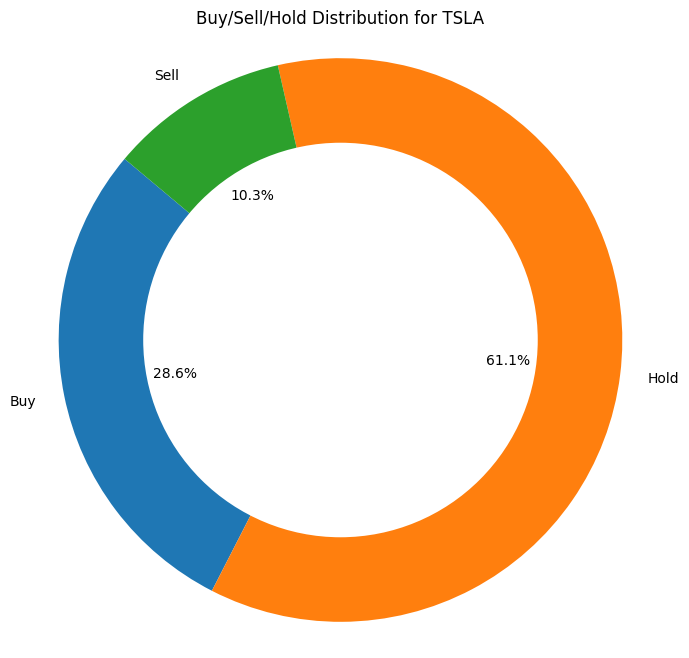

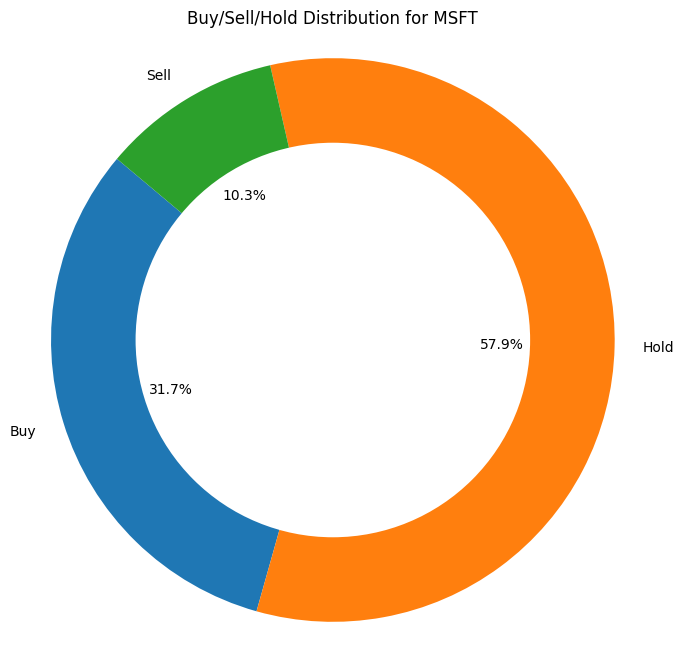

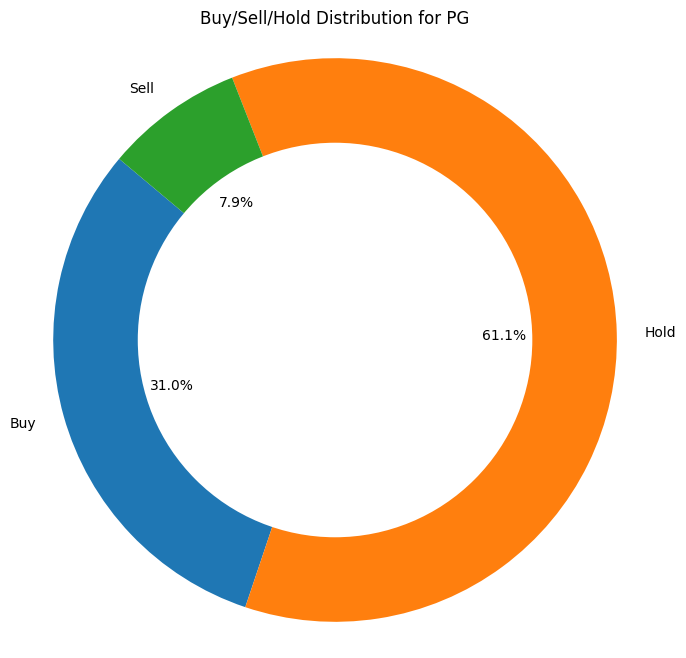

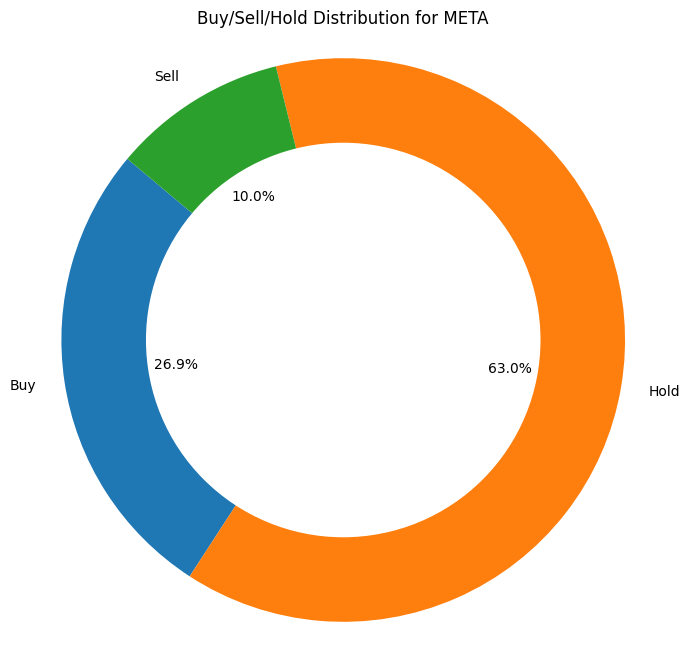

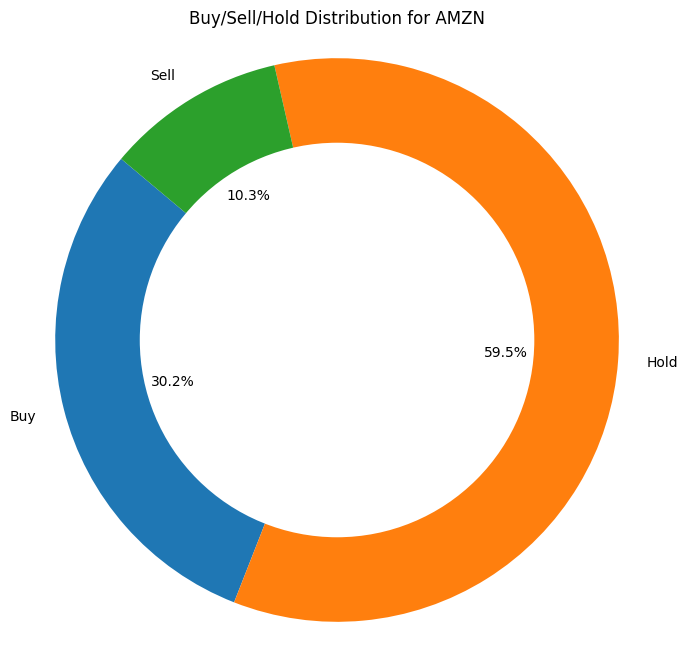

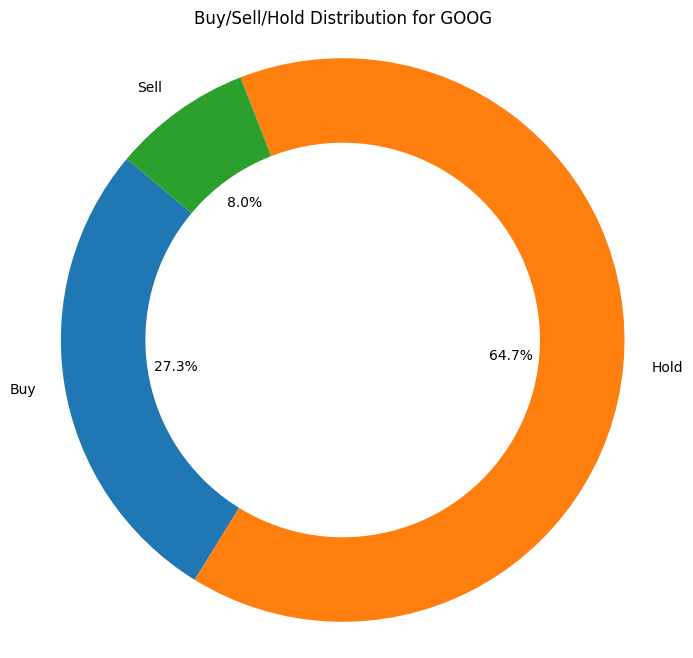

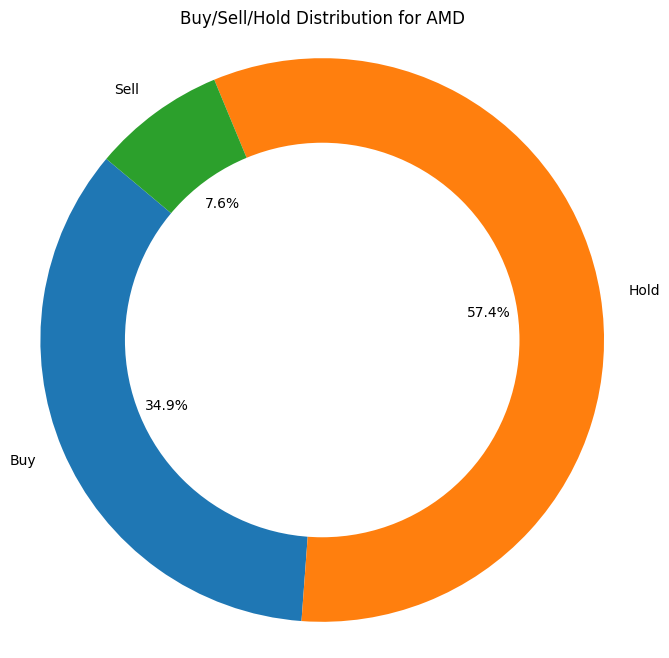

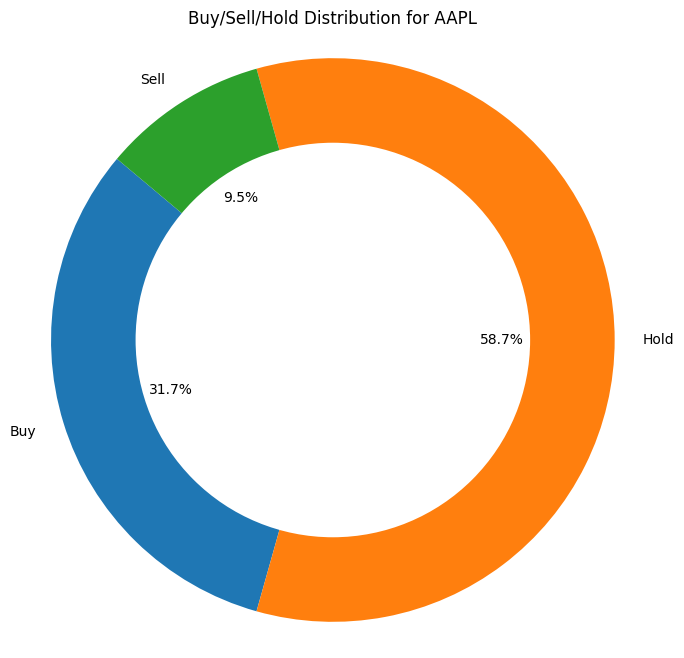

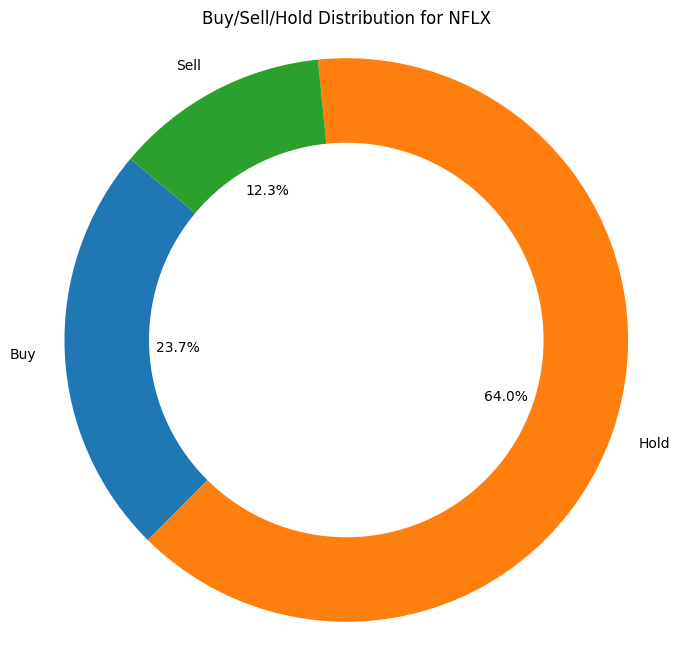

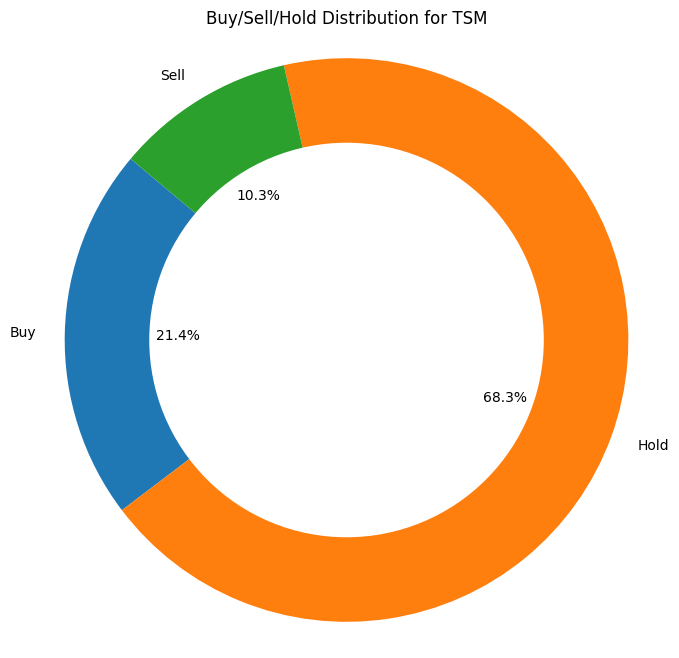

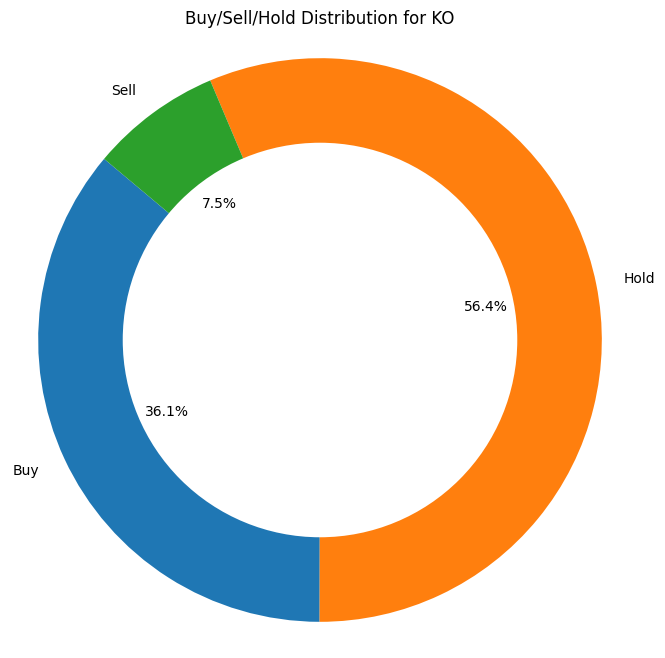

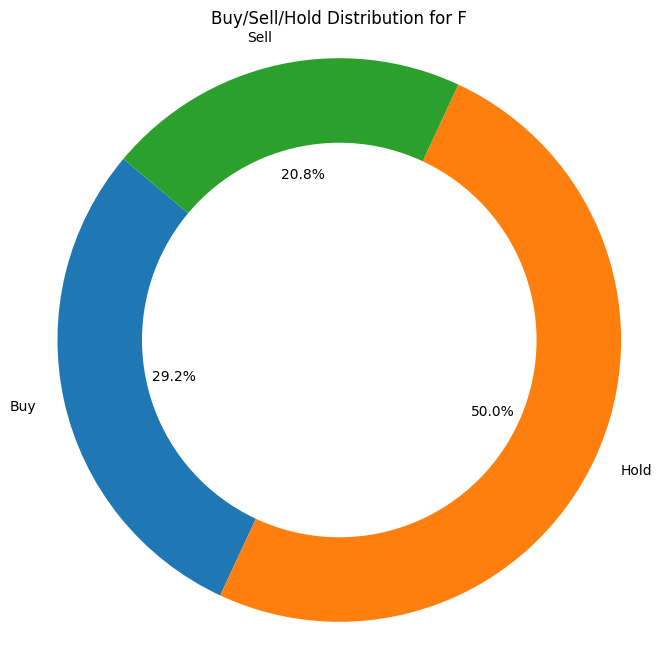

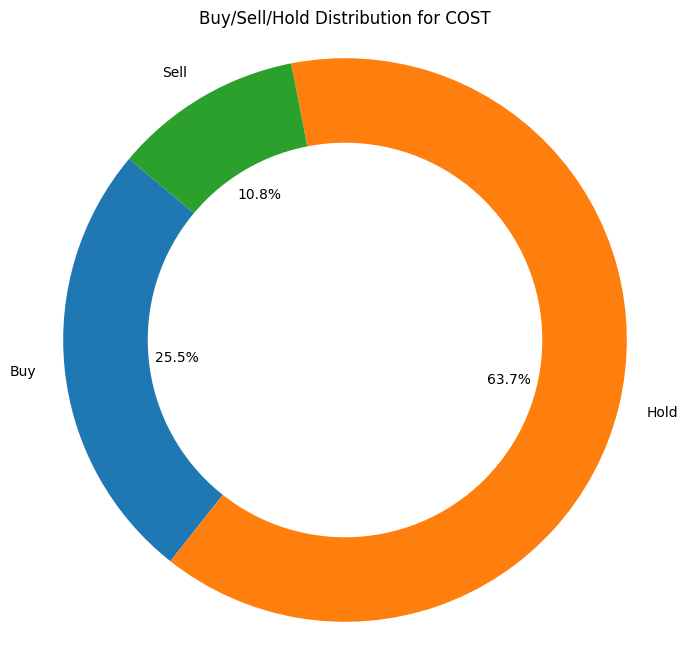

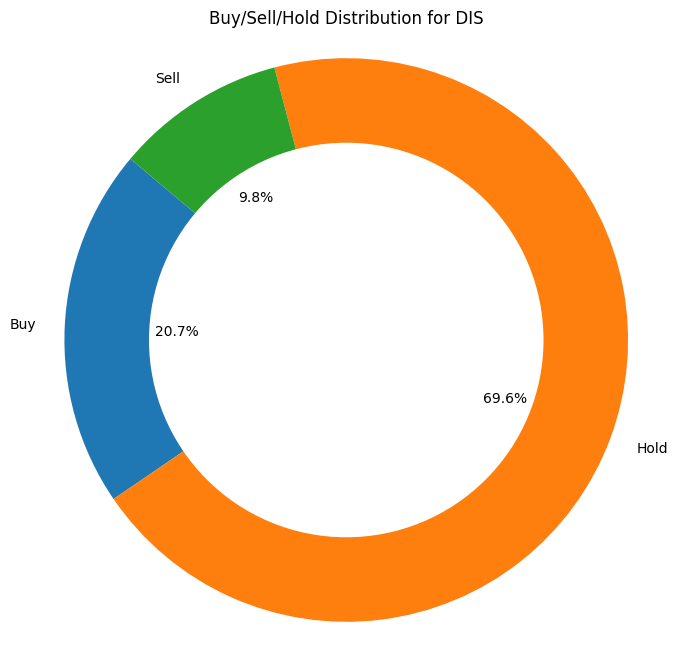

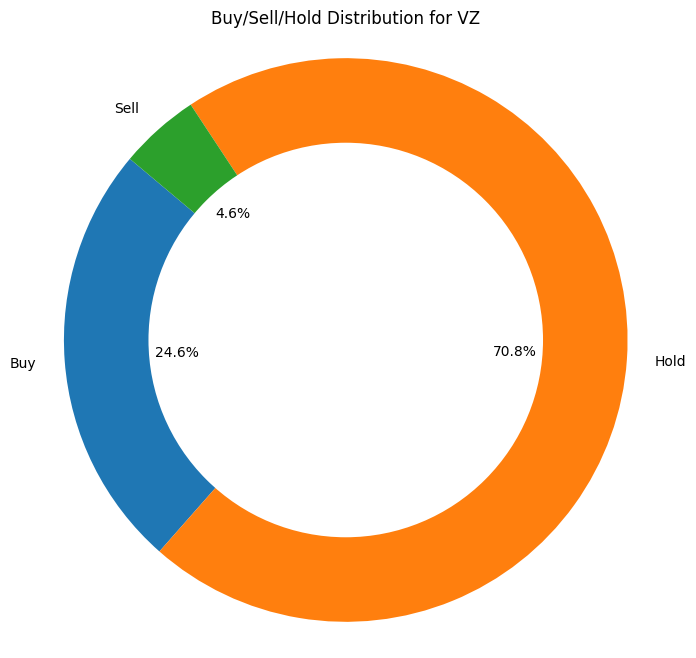

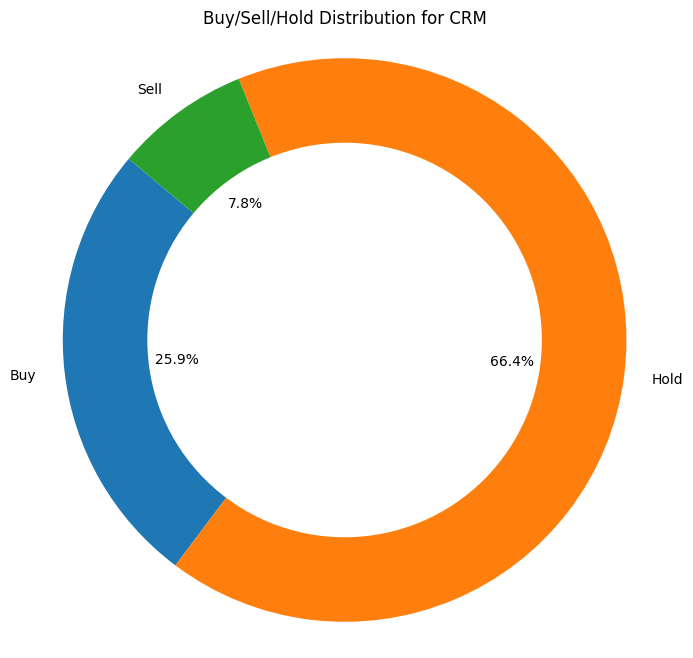

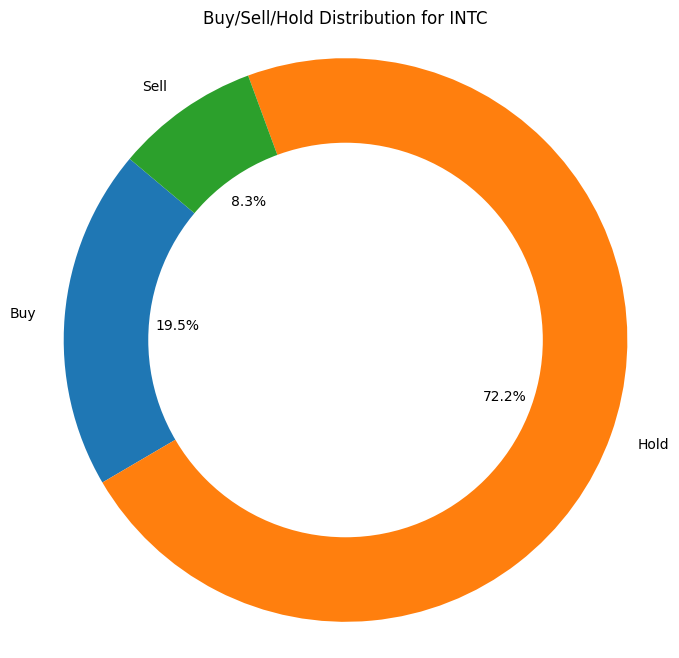

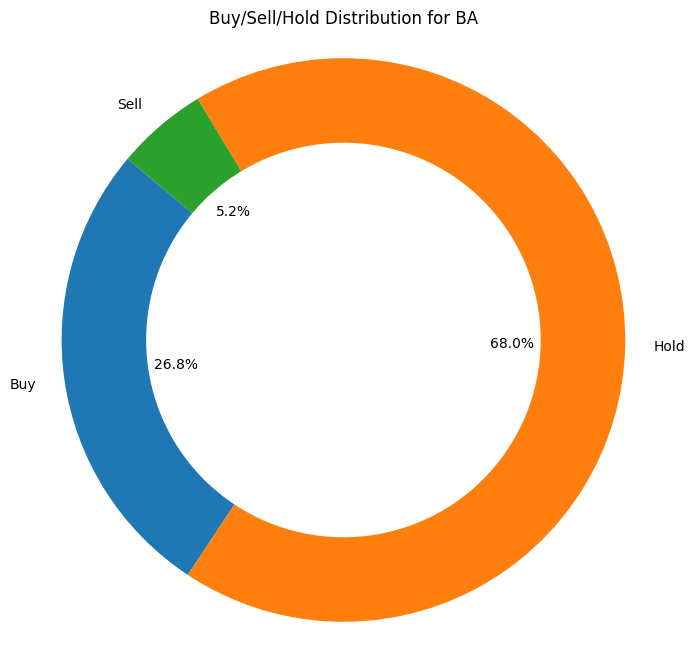

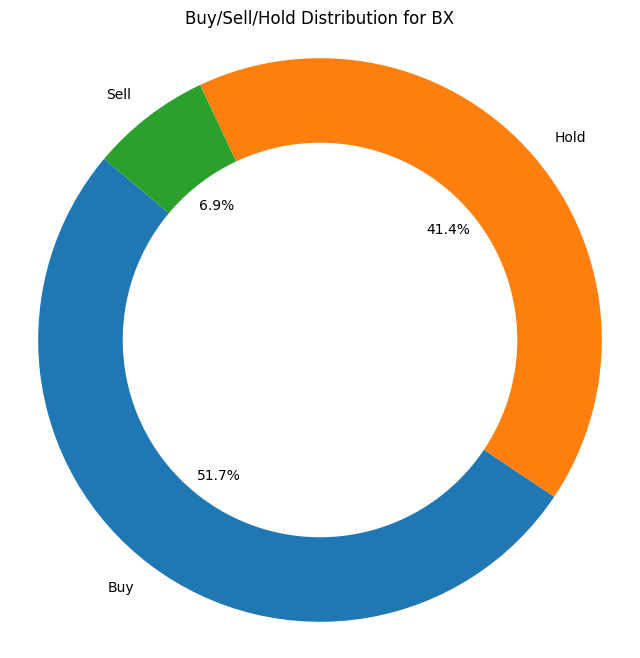

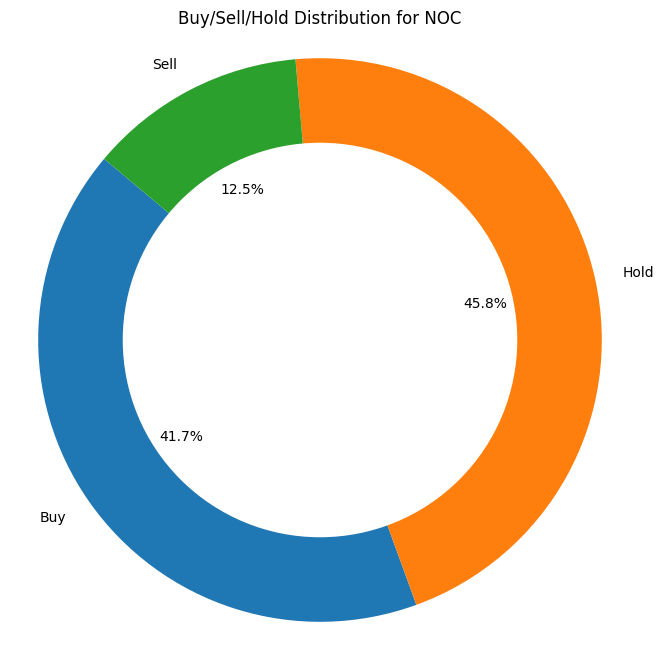

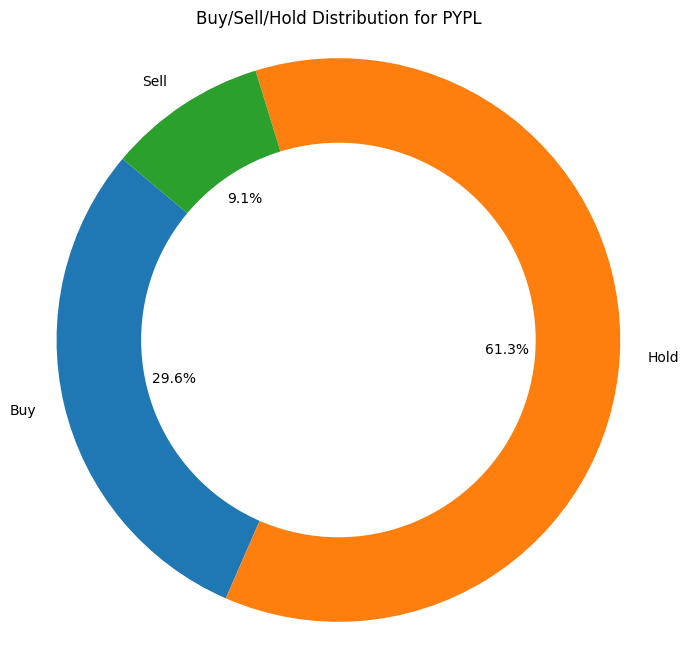

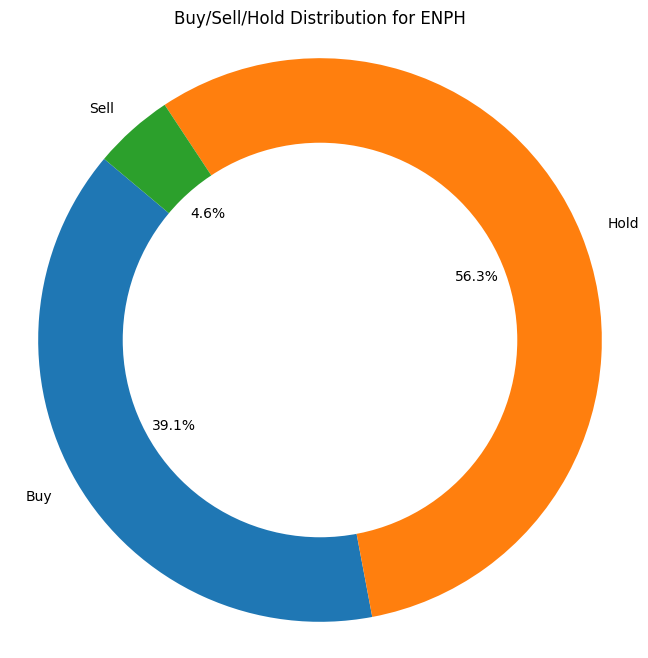

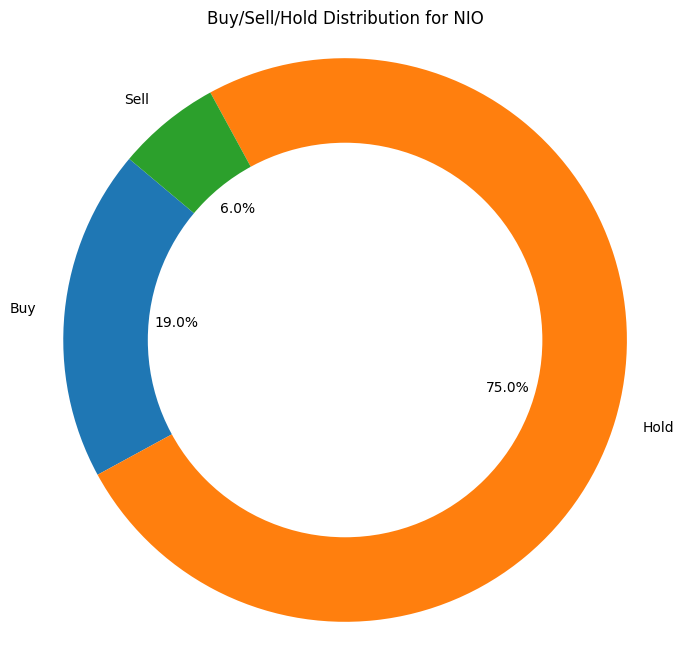

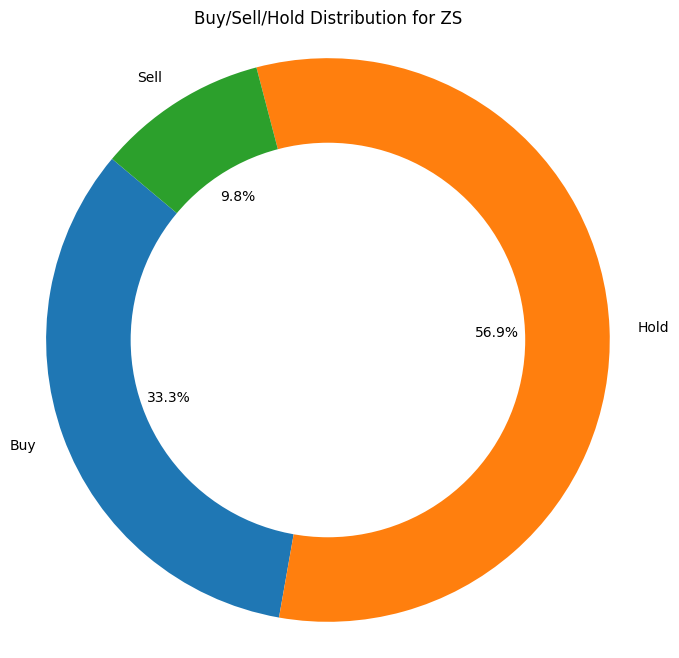

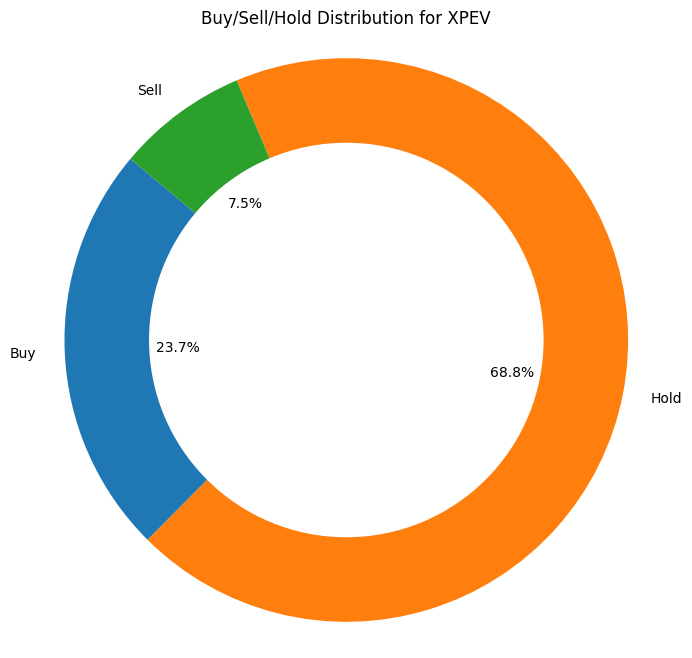

In [18]:
for stock in unique_stocks:
    if stock not in action_counts.index:
        continue
    stock_action_counts = action_counts.loc[stock]
    plt.figure(figsize=(8, 8))
    plt.pie(stock_action_counts, labels=stock_action_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')  # Create a white circle in the center
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)  # Add the circle to the pie chart
    plt.title(f'Buy/Sell/Hold Distribution for {stock}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

In [21]:
for stock in unique_stocks:
    stock_data = tweets_data[tweets_data['Stock Name'] == stock]
    if stock not in action_counts.index:
        continue
    total_tweets = stock_data.shape[0]
    buy_count = action_counts.loc[stock].get('Buy', 0)
    sell_count = action_counts.loc[stock].get('Sell', 0)
    hold_count = action_counts.loc[stock].get('Hold', 0)

    print(f"{stock} Analysis Report:")
    print(f"Total Tweets Analyzed: {total_tweets}")
    print(f"Buy Recommendations: {buy_count} ({(buy_count / total_tweets) * 100:.2f}%)")
    print(f"Sell Recommendations: {sell_count} ({(sell_count / total_tweets) * 100:.2f}%)")
    print(f"Hold Recommendations: {hold_count} ({(hold_count / total_tweets) * 100:.2f}%)")
    print("Recommendations:")

    if buy_count > sell_count:
        print("  - Recommendation: BUY")
    elif sell_count > buy_count:
        print("  - Recommendation: SELL")
    else:
        print("  - Recommendation: HOLD")

    print("\n")

TSLA Analysis Report:
Total Tweets Analyzed: 252
Buy Recommendations: 72 (28.57%)
Sell Recommendations: 26 (10.32%)
Hold Recommendations: 154 (61.11%)
Recommendations:
  - Recommendation: BUY


MSFT Analysis Report:
Total Tweets Analyzed: 252
Buy Recommendations: 80 (31.75%)
Sell Recommendations: 26 (10.32%)
Hold Recommendations: 146 (57.94%)
Recommendations:
  - Recommendation: BUY


PG Analysis Report:
Total Tweets Analyzed: 252
Buy Recommendations: 78 (30.95%)
Sell Recommendations: 20 (7.94%)
Hold Recommendations: 154 (61.11%)
Recommendations:
  - Recommendation: BUY


META Analysis Report:
Total Tweets Analyzed: 219
Buy Recommendations: 59 (26.94%)
Sell Recommendations: 22 (10.05%)
Hold Recommendations: 138 (63.01%)
Recommendations:
  - Recommendation: BUY


AMZN Analysis Report:
Total Tweets Analyzed: 252
Buy Recommendations: 76 (30.16%)
Sell Recommendations: 26 (10.32%)
Hold Recommendations: 150 (59.52%)
Recommendations:
  - Recommendation: BUY


GOOG Analysis Report:
Total Tweet